<a href="https://colab.research.google.com/github/Tommy840602/Random-Forest/blob/main/Random-Forest_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from collections import Counter
from numpy import mean
import missingno as msn


In [111]:
df_train = pd.read_csv("/content/train_data.csv")
df_test = pd.read_csv("/content/test_data.csv")
df_train = df_train.dropna(how = 'all', axis = 0)
df_test = df_test.dropna(how = 'all', axis = 0)

In [112]:
#EDA
df_train.shape, df_test.shape

((10000, 16), (2000, 15))

In [113]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10000 non-null  int64  
 1   profession       9507 non-null   object 
 2   age              5822 non-null   float64
 3   gender           7421 non-null   object 
 4   highestDegree    10000 non-null  object 
 5   maritalStatus    10000 non-null  object 
 6   noOfKids         5467 non-null   float64
 7   creditRisk       10000 non-null  float64
 8   otherMembership  10000 non-null  object 
 9   pastStays1y      9050 non-null   float64
 10  blogger          10000 non-null  object 
 11  articles         10000 non-null  int64  
 12  amexCard         10000 non-null  object 
 13  purposeTravel    10000 non-null  object 
 14  staySpend        10000 non-null  float64
 15  loyaltyClass     10000 non-null  object 
dtypes: float64(5), int64(2), object(9)
memory usage: 1.2+ MB


               count         mean          std   min    25%       50%  \
age           5822.0    39.100481    12.411516  18.0  28.00  39.00000   
noOfKids      5467.0     0.832632     1.018477   0.0   0.00   1.00000   
creditRisk   10000.0     2.889681     0.492806   1.0   2.56   2.89000   
pastStays1y   9050.0    24.719337    14.391174   0.0  12.00  25.00000   
articles     10000.0     7.407800     6.816183   0.0   0.00   6.00000   
staySpend    10000.0  1950.964931  5551.342403   0.0   0.00   0.26747   

                    75%          max  
age           50.000000     60.00000  
noOfKids       1.000000      4.00000  
creditRisk     3.230000      4.00000  
pastStays1y   37.000000     49.00000  
articles      13.000000     20.00000  
staySpend    781.467816  75553.55889  


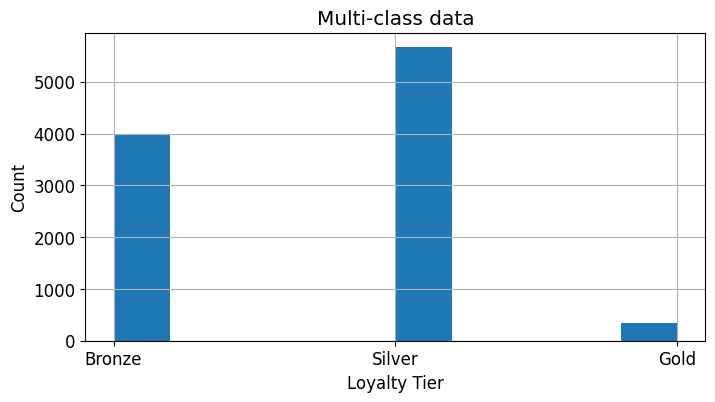

In [114]:
def variables_plot(df, col):
    df[col].hist(figsize = (8,4))
    plt.xlabel('Loyalty Tier')
    plt.ylabel('Count')
    plt.title('Multi-class data')
    df_stats = df.drop('ID', axis = 1)
    print(df_stats.describe().T)
    return plt.show()

variables_plot(df_train, 'loyaltyClass')

In [115]:
df_train.head()

,ID,profession,age,gender,highestDegree,maritalStatus,noOfKids,creditRisk,otherMembership,pastStays1y,blogger,articles,amexCard,purposeTravel,staySpend,loyaltyClass
0,0,Public Sector,NaN,Male,High School Equivalent,Single,0.0,3.18,IHG,23.0,No,7,Yes,Medical Tourism,1433.147527,Bronze
1,1,Private Sector,NaN,NaN,Associate Degree,Married,1.0,2.07,IHG,48.0,No,4,Yes,Leisure Travel,38.379023,Silver
2,2,Business,44.0,Female,Masters Degree,Married,NaN,2.81,Discovery,32.0,No,1,No,Leisure Travel,0.000000,Bronze
3,3,Public Sector,NaN,Male,Bachelors Degree,Single,0.0,3.46,IHG,6.0,No,16,Yes,Medical Tourism,0.000000,Bronze
4,4,Business,NaN,Female,Bachelors Degree,Widowed,NaN,3.21,Marriott,NaN,Yes,0,No,Business,764.418767,Silver


In [116]:
le = LabelEncoder()
df_train['profession'] = le.fit_transform(df_train['profession']).astype('str')
df_test['profession'] = le.fit_transform(df_test['profession']).astype('str')

df_train['gender'] = le.fit_transform(df_train['gender']).astype('str')
df_test['gender'] = le.fit_transform(df_test['gender']).astype('str')

df_train['highestDegree'] = le.fit_transform(df_train['highestDegree']).astype('str')
df_test['highestDegree'] = le.fit_transform(df_test['highestDegree']).astype('str')

df_train['maritalStatus'] = le.fit_transform(df_train['maritalStatus']).astype('str')
df_test['maritalStatus'] = le.fit_transform(df_test['maritalStatus']).astype('str')

df_train['otherMembership'] = le.fit_transform(df_train['otherMembership']).astype('str')
df_test['otherMembership'] = le.fit_transform(df_test['otherMembership']).astype('str')

df_train['blogger'] = le.fit_transform(df_train['blogger']).astype('str')
df_test['blogger'] = le.fit_transform(df_test['blogger']).astype('str')

df_train['amexCard'] = le.fit_transform(df_train['amexCard']).astype('str')
df_test['amexCard'] = le.fit_transform(df_test['amexCard']).astype('str')

df_train['purposeTravel'] = le.fit_transform(df_train['purposeTravel']).astype('str')
df_test['purposeTravel'] = le.fit_transform(df_test['purposeTravel']).astype('str')

df_train['loyaltyClass'] = le.fit_transform(df_train['loyaltyClass']).astype('str')

In [117]:
df_train.head()

,ID,profession,age,gender,highestDegree,maritalStatus,noOfKids,creditRisk,otherMembership,pastStays1y,blogger,articles,amexCard,purposeTravel,staySpend,loyaltyClass
0,0,2,NaN,1,3,2,0.0,3.18,3,23.0,0,7,1,2,1433.147527,0
1,1,1,NaN,2,0,1,1.0,2.07,3,48.0,0,4,1,1,38.379023,2
2,2,0,44.0,0,5,1,NaN,2.81,0,32.0,0,1,0,1,0.000000,0
3,3,2,NaN,1,1,2,0.0,3.46,3,6.0,0,16,1,2,0.000000,0
4,4,0,NaN,0,1,3,NaN,3.21,5,NaN,1,0,0,0,764.418767,2


<Axes: >

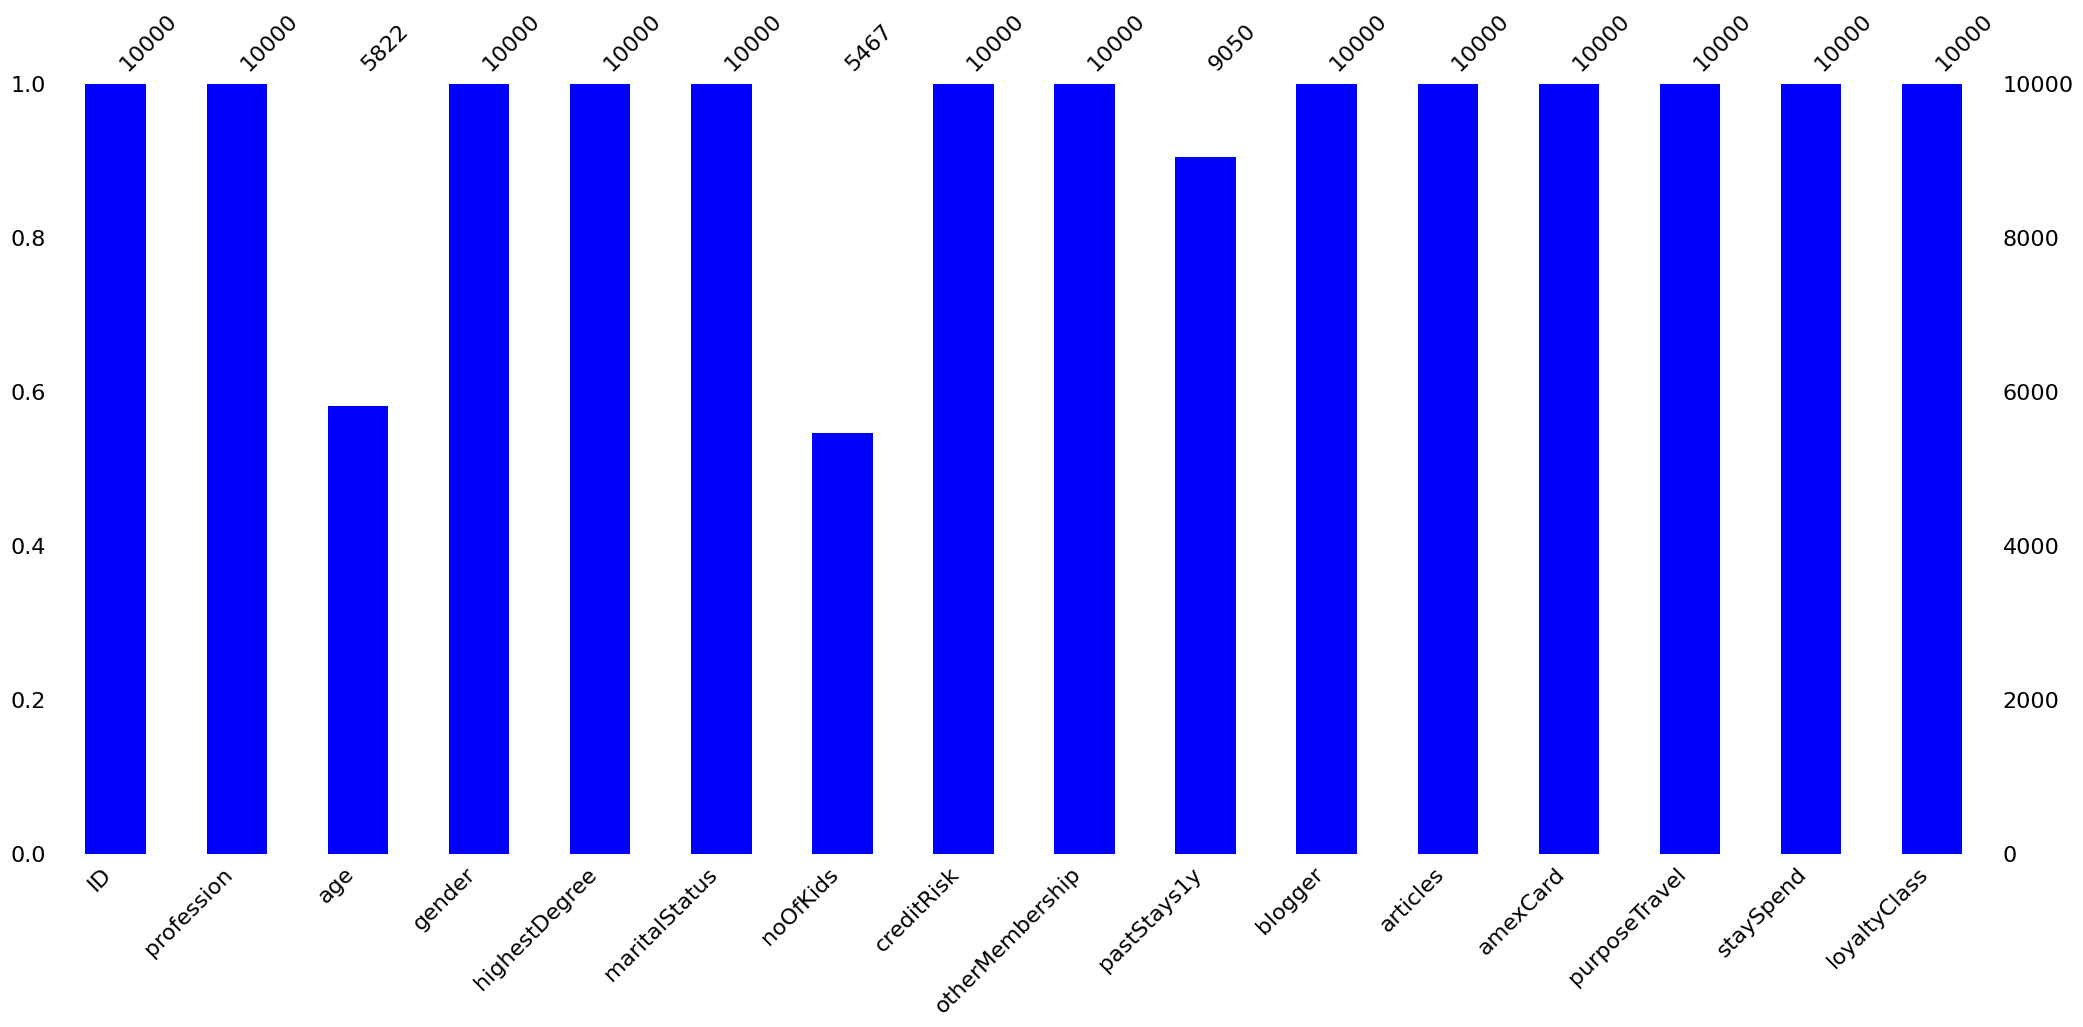

In [118]:
msn.bar(df_train, color = 'blue')

In [119]:
df_train['age'].fillna(df_train['age'].mean(), inplace = True)
df_test['age'].fillna(df_test['age'].mean(), inplace = True)

df_train['noOfKids'].fillna(0, inplace = True)
df_test['noOfKids'].fillna(0, inplace = True)

df_train['pastStays1y'].fillna(0, inplace = True)
df_test['pastStays1y'].fillna(0, inplace = True)

In [120]:
df_train.head()

,ID,profession,age,gender,highestDegree,maritalStatus,noOfKids,creditRisk,otherMembership,pastStays1y,blogger,articles,amexCard,purposeTravel,staySpend,loyaltyClass
0,0,2,39.100481,1,3,2,0.0,3.18,3,23.0,0,7,1,2,1433.147527,0
1,1,1,39.100481,2,0,1,1.0,2.07,3,48.0,0,4,1,1,38.379023,2
2,2,0,44.000000,0,5,1,0.0,2.81,0,32.0,0,1,0,1,0.000000,0
3,3,2,39.100481,1,1,2,0.0,3.46,3,6.0,0,16,1,2,0.000000,0
4,4,0,39.100481,0,1,3,0.0,3.21,5,0.0,1,0,0,0,764.418767,2


In [121]:
print(df_train.columns.to_list())

['ID', 'profession', 'age', 'gender', 'highestDegree', 'maritalStatus', 'noOfKids', 'creditRisk', 'otherMembership', 'pastStays1y', 'blogger', 'articles', 'amexCard', 'purposeTravel', 'staySpend', 'loyaltyClass']


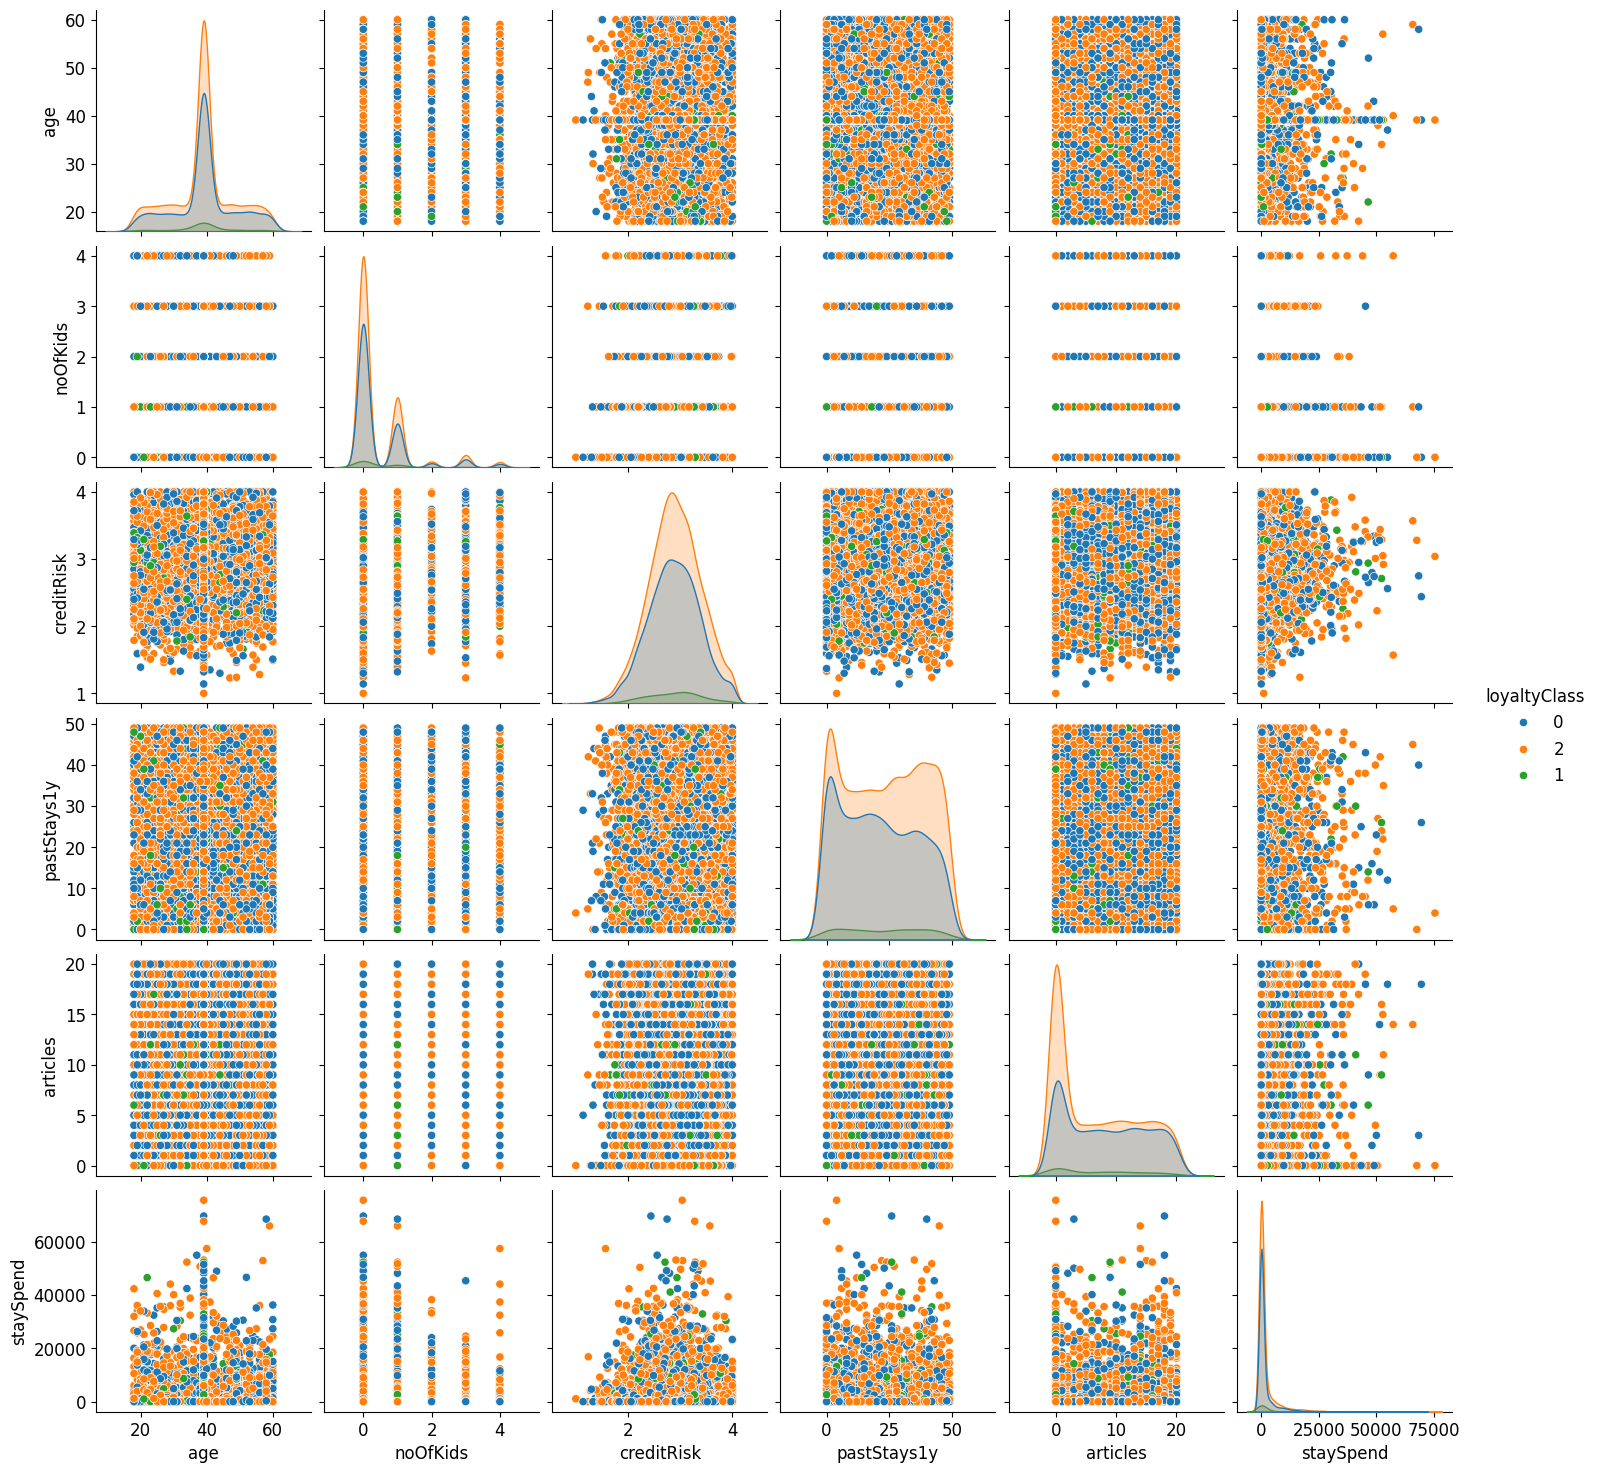

In [122]:
sns.pairplot(df_train,hue='loyaltyClass',vars=['age', 'noOfKids', 'creditRisk', 'pastStays1y', 'articles', 'staySpend'])

In [123]:
df_column_names = list(df_train.columns)
df_column_names.remove('loyaltyClass')

x = df_train.loc[:, df_train.columns != 'loyaltyClass'].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(data = x_scaled, columns = df_column_names)
df_normalized.head()

,ID,profession,age,gender,highestDegree,maritalStatus,noOfKids,creditRisk,otherMembership,pastStays1y,blogger,articles,amexCard,purposeTravel,staySpend
0,0.0000,0.50,0.502392,0.5,0.428571,0.666667,0.00,0.726667,0.500000,0.469388,0.0,0.35,1.0,1.0,0.018969
1,0.0001,0.25,0.502392,1.0,0.000000,0.333333,0.25,0.356667,0.500000,0.979592,0.0,0.20,1.0,0.5,0.000508
2,0.0002,0.00,0.619048,0.0,0.714286,0.333333,0.00,0.603333,0.000000,0.653061,0.0,0.05,0.0,0.5,0.000000
3,0.0003,0.50,0.502392,0.5,0.142857,0.666667,0.00,0.820000,0.500000,0.122449,0.0,0.80,1.0,1.0,0.000000
4,0.0004,0.00,0.502392,0.0,0.142857,1.000000,0.00,0.736667,0.833333,0.000000,1.0,0.00,0.0,0.0,0.010118


<Axes: >

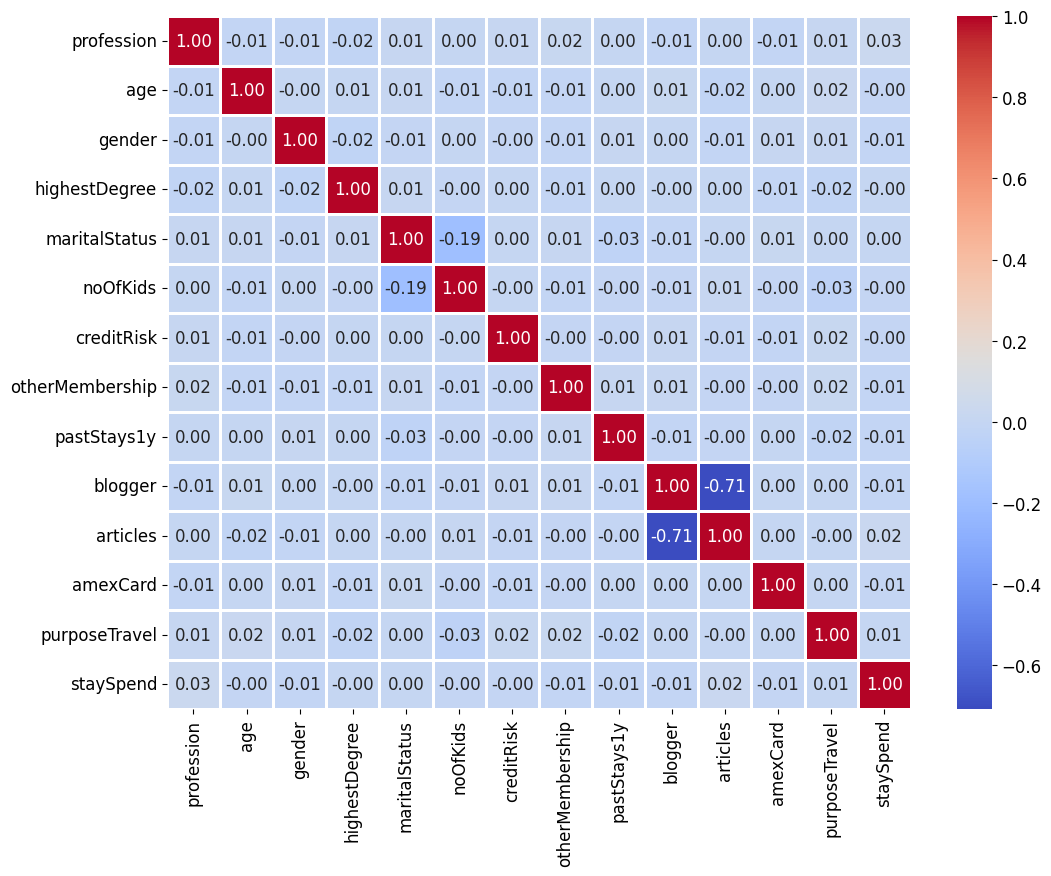

In [124]:
plt.figure(figsize = (12, 9))
sns.heatmap(df_normalized.drop('ID', axis = 1).corr(), annot = True, cmap = "coolwarm",fmt = '.2f',linewidths = 0.8)

In [125]:
dff_column_names = list(df_test.columns)
xt = df_test.loc[:,].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xt)
dff_normalized = pd.DataFrame(data = x_scaled, columns = dff_column_names)
dff_normalized.head()

,ID,profession,age,gender,highestDegree,maritalStatus,noOfKids,creditRisk,otherMembership,pastStays1y,blogger,articles,amexCard,purposeTravel,staySpend
0,0.000000,0.00,0.494853,0.0,0.428571,1.000000,0.50,0.656250,0.833333,0.673469,1.0,0.00,1.0,1.0,0.010070
1,0.000500,0.50,0.095238,0.0,0.428571,0.000000,0.25,0.840278,0.833333,0.346939,0.0,0.20,0.0,0.5,0.115630
2,0.001001,0.50,0.494853,0.5,0.000000,0.333333,0.00,0.486111,1.000000,0.673469,1.0,0.00,1.0,0.5,0.000631
3,0.001501,0.50,0.214286,0.5,0.000000,0.000000,0.00,0.715278,0.500000,0.469388,0.0,0.60,0.0,0.0,0.000000
4,0.002001,0.25,0.494853,1.0,1.000000,0.333333,0.25,0.638889,0.500000,0.428571,0.0,0.05,0.0,0.5,0.000571


In [126]:
df_normalized_target = pd.concat([df_normalized, df_train['loyaltyClass']], axis = 1)
df_normalized_target.head()

,ID,profession,age,gender,highestDegree,maritalStatus,noOfKids,creditRisk,otherMembership,pastStays1y,blogger,articles,amexCard,purposeTravel,staySpend,loyaltyClass
0,0.0000,0.50,0.502392,0.5,0.428571,0.666667,0.00,0.726667,0.500000,0.469388,0.0,0.35,1.0,1.0,0.018969,0
1,0.0001,0.25,0.502392,1.0,0.000000,0.333333,0.25,0.356667,0.500000,0.979592,0.0,0.20,1.0,0.5,0.000508,2
2,0.0002,0.00,0.619048,0.0,0.714286,0.333333,0.00,0.603333,0.000000,0.653061,0.0,0.05,0.0,0.5,0.000000,0
3,0.0003,0.50,0.502392,0.5,0.142857,0.666667,0.00,0.820000,0.500000,0.122449,0.0,0.80,1.0,1.0,0.000000,0
4,0.0004,0.00,0.502392,0.0,0.142857,1.000000,0.00,0.736667,0.833333,0.000000,1.0,0.00,0.0,0.0,0.010118,2


In [128]:
X = df_normalized_target[list(df_normalized_target.columns)[0:15]]
print("X.shape:",X.shape)
Y = df_normalized_target[list(df_normalized_target.columns)[-1]]
print("Y.shape:",Y.shape)

X.shape: (10000, 15)
Y.shape: (10000,)


In [129]:
#data sampling
oversample = RandomOverSampler(sampling_strategy = 'minority')
x, y = oversample.fit_resample(X, Y)
print(Counter(y))

Counter({'2': 5665, '1': 5665, '0': 3998})


In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [131]:
#Random Forest Model
rfc1 = RandomForestClassifier(n_estimators = 200, class_weight = 'balanced', random_state = 42)
rfc1.fit(x_train, y_train)
print(rfc1.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [133]:
#Predictions
rfc_pred1 = rfc1.predict(x_test)

print ("Train-set Accuracy =", metrics.accuracy_score(y_train, rfc1.predict(x_train)))
print ("Test-set Accuracy =", round(metrics.accuracy_score(y_test, rfc_pred1), 2))

Train-set Accuracy = 1.0
Test-set Accuracy = 0.77


In [135]:
#confusion_matrix
cm = confusion_matrix(y_test, rfc_pred1)
print('Confusion matrix\n\n', cm)


Confusion matrix

 [[ 391    1  605]
 [   0 1378    0]
 [ 279    0 1178]]


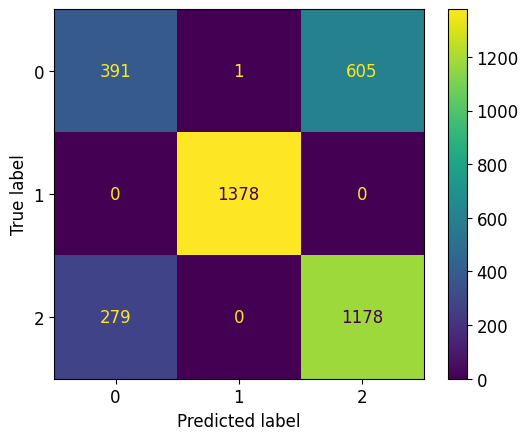

In [137]:
cm_display=ConfusionMatrixDisplay(cm,display_labels=rfc1.classes_).plot()

In [138]:
#Classification Report
print(classification_report(y_test, rfc_pred1))

              precision    recall  f1-score   support

           0       0.58      0.39      0.47       997
           1       1.00      1.00      1.00      1378
           2       0.66      0.81      0.73      1457

    accuracy                           0.77      3832
   macro avg       0.75      0.73      0.73      3832
weighted avg       0.76      0.77      0.76      3832



In [139]:
XT = dff_normalized[list(dff_normalized.columns)[0:15]]
pred = rfc1.predict(XT)
results1 = pd.DataFrame(pred, columns = ['Predicted loyaltyClass'])
dfc1 = pd.concat([df_test, results1], axis = 1)
dfc1.shape

(2000, 16)

              count         mean          std    min    25%        50%  \
age          2000.0    38.783831     9.234016  18.00  36.00  38.783831   
noOfKids     2000.0     0.463500     0.844408   0.00   0.00   0.000000   
creditRisk   2000.0     2.882825     0.497648   1.12   2.55   2.890000   
pastStays1y  2000.0    21.684000    15.325912   0.00   8.00  21.000000   
articles     2000.0     7.664500     6.921553   0.00   0.00   7.000000   
staySpend    2000.0  1874.478352  5616.555419   0.00   0.00   0.152998   

                    75%          max  
age           41.250000     60.00000  
noOfKids       1.000000      4.00000  
creditRisk     3.220000      4.00000  
pastStays1y   35.000000     49.00000  
articles      14.000000     20.00000  
staySpend    852.937309  58905.79461  


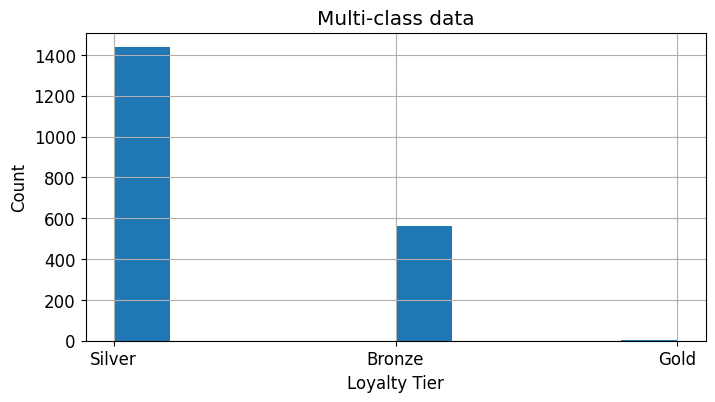

In [140]:
dfc1.loc[(dfc1['Predicted loyaltyClass'] == '0'), 'loyaltyTier'] = 'Bronze'
dfc1.loc[(dfc1['Predicted loyaltyClass'] == '1'), 'loyaltyTier'] = 'Gold'
dfc1.loc[(dfc1['Predicted loyaltyClass'] == '2'), 'loyaltyTier'] = 'Silver'

variables_plot(dfc1, 'loyaltyTier')

In [141]:
rfc2 = RandomForestClassifier(criterion = "entropy", n_estimators = 200, class_weight = 'balanced', random_state = 42)
rfc2.fit(x_train, y_train)
print(rfc2.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [143]:
rfc_pred2 = rfc2.predict(x_test)

print ("Train-set Accuracy =", metrics.accuracy_score(y_train, rfc2.predict(x_train)))
print ("Test-set Accuracy =", round(metrics.accuracy_score(y_test, rfc_pred2), 2))

Train-set Accuracy = 1.0
Test-set Accuracy = 0.77


In [144]:
#confusion_matrix
cm = confusion_matrix(y_test, rfc_pred2)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 381    0  616]
 [   0 1378    0]
 [ 277    1 1179]]


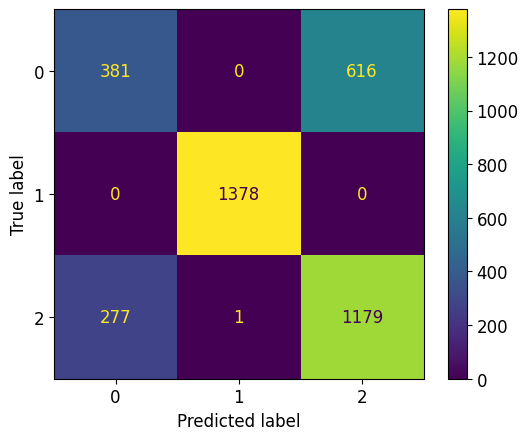

In [145]:
cm_display=ConfusionMatrixDisplay(cm,display_labels=rfc2.classes_).plot()

In [146]:
#Classification Report
print(classification_report(y_test, rfc_pred2))

              precision    recall  f1-score   support

           0       0.58      0.38      0.46       997
           1       1.00      1.00      1.00      1378
           2       0.66      0.81      0.73      1457

    accuracy                           0.77      3832
   macro avg       0.75      0.73      0.73      3832
weighted avg       0.76      0.77      0.75      3832



In [147]:
XT = dff_normalized[list(dff_normalized.columns)[0:15]]
pred = rfc2.predict(XT)
results2 = pd.DataFrame(pred, columns = ['Predicted loyaltyClass'])
dfc2 = pd.concat([df_test, results2], axis = 1)
dfc2.shape

(2000, 16)

              count         mean          std    min    25%        50%  \
age          2000.0    38.783831     9.234016  18.00  36.00  38.783831   
noOfKids     2000.0     0.463500     0.844408   0.00   0.00   0.000000   
creditRisk   2000.0     2.882825     0.497648   1.12   2.55   2.890000   
pastStays1y  2000.0    21.684000    15.325912   0.00   8.00  21.000000   
articles     2000.0     7.664500     6.921553   0.00   0.00   7.000000   
staySpend    2000.0  1874.478352  5616.555419   0.00   0.00   0.152998   

                    75%          max  
age           41.250000     60.00000  
noOfKids       1.000000      4.00000  
creditRisk     3.220000      4.00000  
pastStays1y   35.000000     49.00000  
articles      14.000000     20.00000  
staySpend    852.937309  58905.79461  


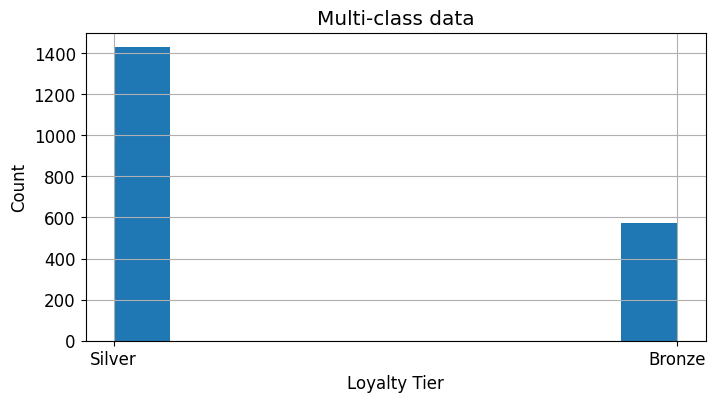

In [148]:
dfc2.loc[(dfc2['Predicted loyaltyClass'] == '0'), 'loyaltyTier'] = 'Bronze'
dfc2.loc[(dfc2['Predicted loyaltyClass'] == '1'), 'loyaltyTier'] = 'Gold'
dfc2.loc[(dfc2['Predicted loyaltyClass'] == '2'), 'loyaltyTier'] = 'Silver'

variables_plot(dfc2, 'loyaltyTier')

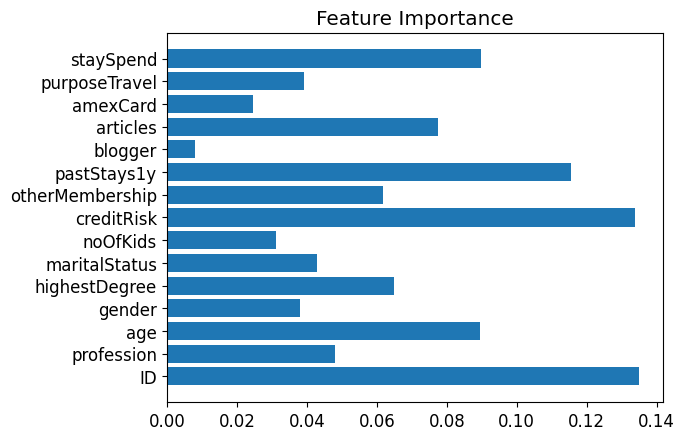

In [149]:
plt.barh(dff_normalized.columns, rfc1.feature_importances_)
plt.title ('Feature Importance')
plt.show()

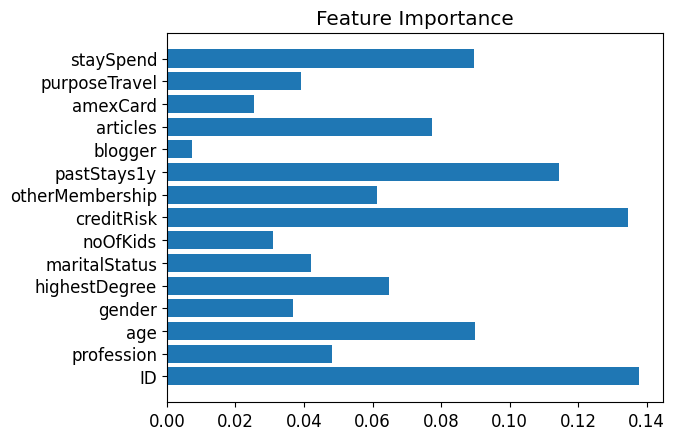

In [150]:
plt.barh(dff_normalized.columns, rfc2.feature_importances_)
plt.title ('Feature Importance')
plt.show()

In [151]:
dfc2 = dfc2.drop(dfc2.columns[1:15], axis = 1)
dfc2.to_csv('Submission.csv', index = False)

In [152]:
resultdf = pd.read_csv('./Submission.csv')
resultdf.head()

,ID,Predicted loyaltyClass,loyaltyTier
0,0,2,Silver
1,1,0,Bronze
2,2,2,Silver
3,3,0,Bronze
4,4,2,Silver


In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [155]:
rfc3 = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', class_weight = 'balanced', random_state = 42)
rfc3.fit(x_train, y_train)
print(rfc3.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [160]:
rfc_pred3 = rfc3.predict(x_test)

print ("Train-set Accuracy =", metrics.accuracy_score(y_train, rfc3.predict(x_train)))
print ("Test-set Accuracy =", metrics.accuracy_score(y_test, rfc_pred3))

Train-set Accuracy = 1.0
Test-set Accuracy = 0.7667014613778705


In [161]:
#confusion matrix
cm = confusion_matrix(y_test, rfc_pred3)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 381    0  616]
 [   0 1378    0]
 [ 277    1 1179]]


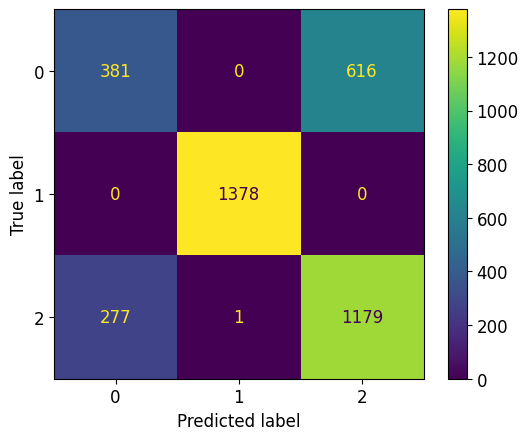

In [162]:
cm_display=ConfusionMatrixDisplay(cm,display_labels=rfc3.classes_).plot()

In [163]:
#classification report
print(classification_report(y_test, rfc_pred3))

              precision    recall  f1-score   support

           0       0.58      0.38      0.46       997
           1       1.00      1.00      1.00      1378
           2       0.66      0.81      0.73      1457

    accuracy                           0.77      3832
   macro avg       0.75      0.73      0.73      3832
weighted avg       0.76      0.77      0.75      3832



In [164]:
XT = dff_normalized[list(dff_normalized.columns)[0:15]]
pred3 = rfc3.predict(XT)

In [165]:
results = pd.DataFrame(pred3, columns = ['Predicted loyaltyClass'])
dfc3 = pd.concat([df_test, results], axis = 1)
dfc3.shape

(2000, 16)

In [166]:
dfc3.loc[(dfc3['Predicted loyaltyClass'] == '0'), 'loyaltyTier'] = 'Bronze'
dfc3.loc[(dfc3['Predicted loyaltyClass'] == '1'), 'loyaltyTier'] = 'Gold'
dfc3.loc[(dfc3['Predicted loyaltyClass'] == '2'), 'loyaltyTier'] = 'Silver'
dfc3.head()

,ID,profession,age,gender,highestDegree,maritalStatus,noOfKids,creditRisk,otherMembership,pastStays1y,blogger,articles,amexCard,purposeTravel,staySpend,Predicted loyaltyClass,loyaltyTier
0,0,0,38.783831,0,3,3,2.0,3.01,5,33.0,1,0,1,2,593.200540,2,Silver
1,1,2,22.000000,0,3,0,1.0,3.54,5,17.0,0,4,0,1,6811.249373,0,Bronze
2,2,2,38.783831,1,0,1,0.0,2.52,6,33.0,1,0,1,1,37.157287,2,Silver
3,3,2,27.000000,1,0,0,0.0,3.18,3,23.0,0,12,0,0,0.000000,0,Bronze
4,4,1,38.783831,2,7,1,1.0,2.96,3,21.0,0,1,0,1,33.623512,2,Silver


              count         mean          std    min    25%        50%  \
age          2000.0    38.783831     9.234016  18.00  36.00  38.783831   
noOfKids     2000.0     0.463500     0.844408   0.00   0.00   0.000000   
creditRisk   2000.0     2.882825     0.497648   1.12   2.55   2.890000   
pastStays1y  2000.0    21.684000    15.325912   0.00   8.00  21.000000   
articles     2000.0     7.664500     6.921553   0.00   0.00   7.000000   
staySpend    2000.0  1874.478352  5616.555419   0.00   0.00   0.152998   

                    75%          max  
age           41.250000     60.00000  
noOfKids       1.000000      4.00000  
creditRisk     3.220000      4.00000  
pastStays1y   35.000000     49.00000  
articles      14.000000     20.00000  
staySpend    852.937309  58905.79461  


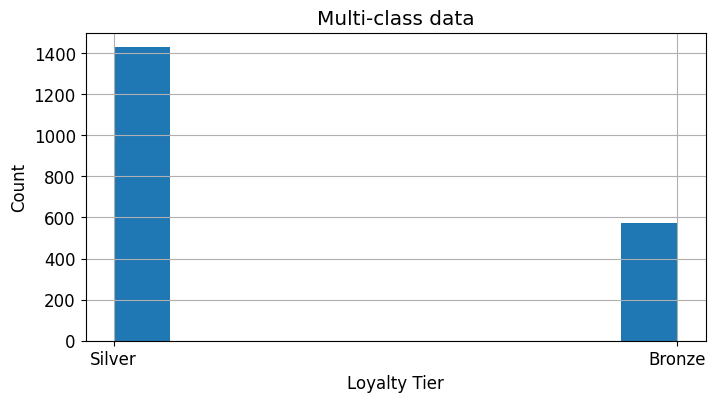

In [167]:
variables_plot(dfc3, 'loyaltyTier')

In [168]:
rfc4 = RandomForestClassifier(n_estimators = 200, criterion = 'gini', class_weight = 'balanced', random_state = 42)
rfc4.fit(x_train, y_train)
print(rfc4.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [174]:
rfc_pred4 = rfc4.predict(x_test)
print ("Train Accuracy=", metrics.accuracy_score(y_train, rfc4.predict(x_train)))
print ("Test Accuracy=", metrics.accuracy_score(y_test, rfc_pred4))

Train Accuracy= 1.0
Test Accuracy= 0.7690501043841336


In [170]:
#confusion matrix
cm = confusion_matrix(y_test, rfc_pred4)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 391    1  605]
 [   0 1378    0]
 [ 279    0 1178]]


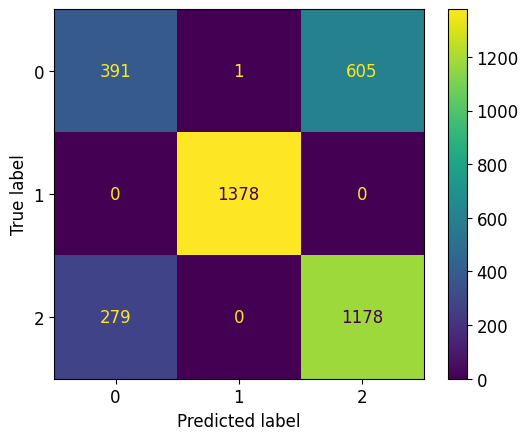

In [171]:
cm_display=ConfusionMatrixDisplay(cm,display_labels=rfc4.classes_).plot()

In [172]:
#classification report
print(classification_report(y_test, rfc_pred4))

              precision    recall  f1-score   support

           0       0.58      0.39      0.47       997
           1       1.00      1.00      1.00      1378
           2       0.66      0.81      0.73      1457

    accuracy                           0.77      3832
   macro avg       0.75      0.73      0.73      3832
weighted avg       0.76      0.77      0.76      3832



              count         mean          std    min    25%        50%  \
age          2000.0    38.783831     9.234016  18.00  36.00  38.783831   
noOfKids     2000.0     0.463500     0.844408   0.00   0.00   0.000000   
creditRisk   2000.0     2.882825     0.497648   1.12   2.55   2.890000   
pastStays1y  2000.0    21.684000    15.325912   0.00   8.00  21.000000   
articles     2000.0     7.664500     6.921553   0.00   0.00   7.000000   
staySpend    2000.0  1874.478352  5616.555419   0.00   0.00   0.152998   

                    75%          max  
age           41.250000     60.00000  
noOfKids       1.000000      4.00000  
creditRisk     3.220000      4.00000  
pastStays1y   35.000000     49.00000  
articles      14.000000     20.00000  
staySpend    852.937309  58905.79461  


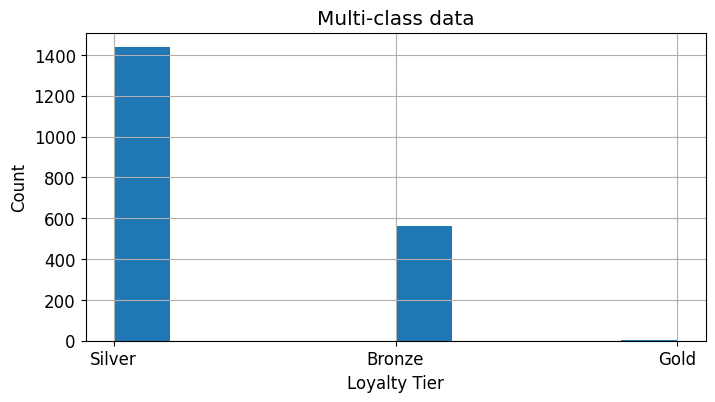

In [176]:
XT = dff_normalized[list(dff_normalized.columns)[0:15]]

pred4 = rfc4.predict(XT)
results = pd.DataFrame(pred4, columns = ['Predicted loyaltyClass'])
dfc4 = pd.concat([df_test, results], axis = 1)

dfc4.loc[(dfc4['Predicted loyaltyClass'] == '0'), 'loyaltyTier'] = 'Bronze'
dfc4.loc[(dfc4['Predicted loyaltyClass'] == '1'), 'loyaltyTier'] = 'Gold'
dfc4.loc[(dfc4['Predicted loyaltyClass'] == '2'), 'loyaltyTier'] = 'Silver'

variables_plot(dfc4, 'loyaltyTier')